In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [61]:
def draw_circle(n=6, center=(0,0), radius=1):
    circle = plt.Circle(center, radius,fill=False)
    fig, ax = plt.subplots()
    # change default range so that new circles will work
    ax.set_aspect('equal')
    ax.set_xlim((center[0] - radius - 0.5, center[0] + radius + 0.5))
    ax.set_ylim((center[1] - radius - 0.5, center[1] + radius + 0.5))
    
    ax.add_patch(circle)
    
    # Calculate the vertices of the hexagon
    theta = np.linspace(0, 360, n+1)
    x = radius * np.cos(np.deg2rad(np.mod(theta, 360.0))) + center[0]
    y = radius * np.sin(np.deg2rad(np.mod(theta, 360.0))) + center[1]
    
    for xi,yi in zip(x,y):
        ax.plot((center[0],xi),(center[1],yi),'b',linestyle='-')
    
    # Draw the hexagon
    ax.plot(x, y)
    
    plt.show()

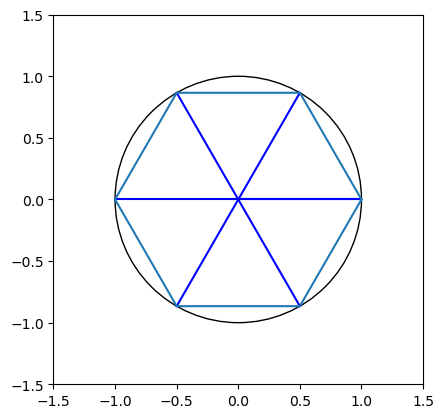

In [70]:
n,r=6,1
h,k=0,0
draw_circle(n=n, center=(h,k), radius=r)

In [71]:
S_n = [r]
pi = [(n*S_n[0])/(2*r)]
pi

# 100 different approximations
NUMS=20

for i in range(NUMS):
    a=np.sqrt(np.square(r) - np.square(S_n[i]/2))
    b=r-a
    S_n.append(np.sqrt(np.square((S_n[i]/2)) + np.square(b) ))
    pi.append((n*S_n[i])/(2*r))
    n*=2

In [72]:
print(len(pi))

21


In [77]:
def plot_error(y_predicted,y_actual): 
    # Calculate absolute error
    error = np.abs(np.array(y_predicted) -y_actual)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(error, marker='o', color='red', linestyle='-', label='Absolute Error')
    plt.xlabel('Data Point Index')
    plt.ylabel('Error')
    plt.title('Absolute Error Between Predicted and Actual Values')
    plt.legend()
    plt.show()
    return error

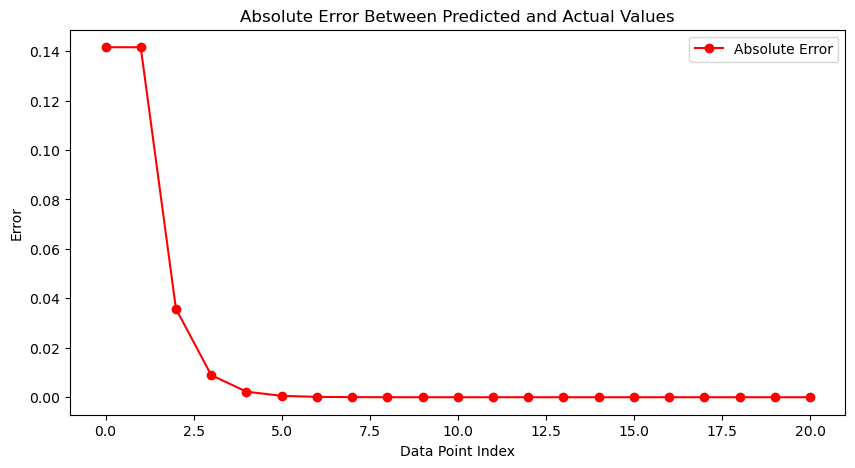

In [78]:
err = plot_error(pi,np.pi)

In [79]:
print(err)

[1.41592654e-01 1.41592654e-01 3.57641124e-02 8.96404031e-03
 2.24245054e-03 5.60702699e-04 1.40181304e-04 3.50456779e-05
 8.76144147e-06 2.19036174e-06 5.47590521e-07 1.36897635e-07
 3.42244091e-08 8.55610205e-09 2.13902496e-09 5.34755795e-10
 1.33688616e-10 3.34212658e-11 8.35509439e-12 2.08855155e-12
 5.21804822e-13]
